<a href="https://colab.research.google.com/github/HLTT14/Social-and-Economic-Networks/blob/main/HW3/SEN_HW3_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

## Download Datasets

In [1]:
!git clone https://github.com/HLTT14/Social-and-Economic-Networks.git

Cloning into 'Social-and-Economic-Networks'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 52 (delta 12), reused 22 (delta 3), pack-reused 0
Unpacking objects: 100% (52/52), done.


## Install Libraries

In [2]:
pip install networkx

## Import Libraries

In [3]:
import networkx as nx

# **Initialization**

## Read Files

In [4]:
with open("/content/Social-and-Economic-Networks/HW3/email-Eu-core.txt") as file:
    lines = file.readlines()
    edges = []
    for line in lines:
        edges.append(tuple(line.split()))

# **Main**

## Create Graph

In [5]:
DG = nx.DiGraph()
DG.add_edges_from(edges)

## Convert to Undirected Graph

In [6]:
G = DG.to_undirected()

## Remove Selfloops

In [7]:
G.remove_edges_from(nx.selfloop_edges(G))

## Girvan-Newman Algorithm

In [8]:
def get_edge_with_highest_betweenness(G):
  betweenness = nx.edge_betweenness_centrality(G)
  return max(betweenness, key=betweenness.get)

In [18]:
def girvan_newman(G, limit):
  while nx.number_connected_components(G) < limit:
      u, v = get_edge_with_highest_betweenness(G)
      G.remove_edge(u, v)
      G.remove_nodes_from(list(nx.isolates(G)))
  return G

In [19]:
result = girvan_newman(G, 42)

KeyboardInterrupt: ignored

In [ ]:
nx.draw(result)

## Compare with Real Data

In [10]:
with open("/content/Social-and-Economic-Networks/HW3/email-Eu-core-department-labels.txt") as file:
    lines = file.readlines()
    edges = []
    for line in lines:
        edges.append(tuple(line.split()))

In [13]:
G2 = nx.Graph()
G2.add_edges_from(edges)

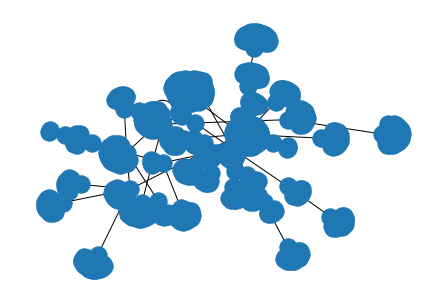

In [14]:
nx.draw(G2)